# **Basic Neural Network**  
### *Podstawowe sieci neuronowe*

---

## **English**

A Neural Network is a computing system inspired by biological neural networks. It consists of interconnected nodes (neurons) that process information using a connectionist approach to computation.

### **Key Components**

1. **Neurons (Nodes)**: Basic processing units that receive inputs, apply weights, and produce outputs
2. **Layers**: Groups of neurons organized in input, hidden, and output layers
3. **Weights**: Parameters that determine the strength of connections between neurons
4. **Activation Functions**: Functions that introduce non-linearity to the network

### **Mathematical Foundation**

For a single neuron, the output is calculated as:

$$
y = f\left(\sum_{i=1}^{n} w_i x_i + b\right)
$$

where:
- $x_i$ are the inputs
- $w_i$ are the weights
- $b$ is the bias
- $f$ is the activation function

### **Common Activation Functions**

1. **Sigmoid**: $f(x) = \frac{1}{1 + e^{-x}}$
2. **ReLU**: $f(x) = \max(0, x)$
3. **Tanh**: $f(x) = \tanh(x)$

---

## **Polish**

Sieć neuronowa to system obliczeniowy inspirowany biologicznymi sieciami neuronowymi. Składa się z połączonych węzłów (neuronów), które przetwarzają informacje przy użyciu podejścia koneksjonistycznego do obliczeń.

### **Kluczowe komponenty**

1. **Neurony (Węzły)**: Podstawowe jednostki przetwarzające, które odbierają wejścia, stosują wagi i produkują wyjścia
2. **Warstwy**: Grupy neuronów zorganizowane w warstwy wejściowe, ukryte i wyjściowe
3. **Wagi**: Parametry określające siłę połączeń między neuronami
4. **Funkcje aktywacji**: Funkcje wprowadzające nieliniowość do sieci

### **Podstawy matematyczne**

Dla pojedynczego neuronu wyjście jest obliczane jako:

$$
y = f\left(\sum_{i=1}^{n} w_i x_i + b\right)
$$

gdzie:
- $x_i$ to wejścia
- $w_i$ to wagi
- $b$ to bias
- $f$ to funkcja aktywacji


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")


Libraries imported successfully!


## **Activation Functions / Funkcje aktywacji**


In [2]:
def sigmoid(x):
    """Sigmoid activation function"""
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

def relu(x):
    """ReLU activation function"""
    return np.maximum(0, x)

def tanh(x):
    """Tanh activation function"""
    return np.tanh(x)

def sigmoid_derivative(x):
    """Derivative of sigmoid function"""
    return x * (1 - x)

def relu_derivative(x):
    """Derivative of ReLU function"""
    return (x > 0).astype(float)

def tanh_derivative(x):
    """Derivative of tanh function"""
    return 1 - x**2


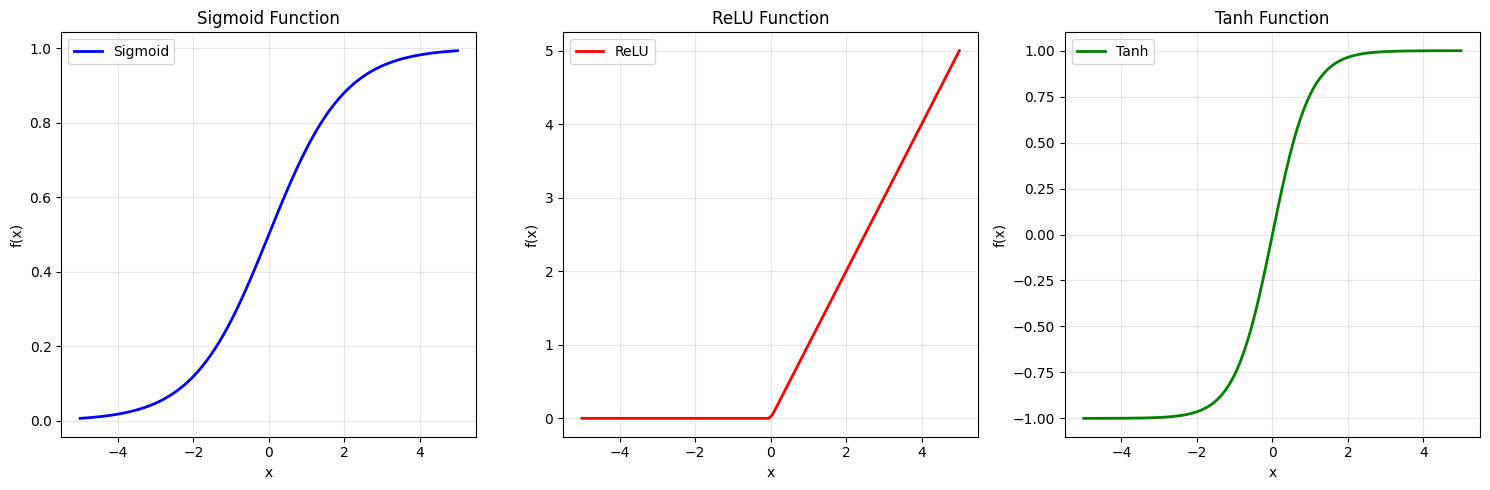

In [3]:
# Visualize activation functions
x = np.linspace(-5, 5, 100)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(x, sigmoid(x), 'b-', linewidth=2, label='Sigmoid')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(x, relu(x), 'r-', linewidth=2, label='ReLU')
plt.title('ReLU Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(x, tanh(x), 'g-', linewidth=2, label='Tanh')
plt.title('Tanh Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()


## **Simple Neural Network Implementation / Implementacja prostej sieci neuronowej**


In [4]:
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        """
        Initialize a simple neural network with one hidden layer
        
        Parameters:
        - input_size: number of input features
        - hidden_size: number of neurons in hidden layer
        - output_size: number of output neurons
        - learning_rate: learning rate for gradient descent
        """
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        # Initialize weights and biases randomly
        self.W1 = np.random.randn(self.input_size, self.hidden_size) * 0.5
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size) * 0.5
        self.b2 = np.zeros((1, self.output_size))
        
        # Store training history
        self.loss_history = []
        
    def forward(self, X):
        """
        Forward propagation
        """
        # Hidden layer
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = sigmoid(self.z1)
        
        # Output layer
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = sigmoid(self.z2)
        
        return self.a2
    
    def backward(self, X, y, output):
        """
        Backward propagation
        """
        m = X.shape[0]
        
        # Calculate gradients for output layer
        dz2 = output - y
        dW2 = (1/m) * np.dot(self.a1.T, dz2)
        db2 = (1/m) * np.sum(dz2, axis=0, keepdims=True)
        
        # Calculate gradients for hidden layer
        dz1 = np.dot(dz2, self.W2.T) * sigmoid_derivative(self.a1)
        dW1 = (1/m) * np.dot(X.T, dz1)
        db1 = (1/m) * np.sum(dz1, axis=0, keepdims=True)
        
        # Update weights and biases
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
    
    def train(self, X, y, epochs=1000, verbose=True):
        """
        Train the neural network
        """
        for epoch in range(epochs):
            # Forward propagation
            output = self.forward(X)
            
            # Calculate loss (Mean Squared Error)
            loss = np.mean((output - y) ** 2)
            self.loss_history.append(loss)
            
            # Backward propagation
            self.backward(X, y, output)
            
            if verbose and epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss:.4f}')
    
    def predict(self, X):
        """
        Make predictions
        """
        return self.forward(X)
    
    def predict_binary(self, X, threshold=0.5):
        """
        Make binary predictions
        """
        return (self.predict(X) > threshold).astype(int)


## **Example: Binary Classification / Przykład: Klasyfikacja binarna**


In [5]:
# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, 
                          n_informative=2, n_clusters_per_class=1, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape y for network
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")
print(f"Classes: {np.unique(y)}")


Training set shape: (800, 2)
Test set shape: (200, 2)
Classes: [0 1]


In [6]:
# Create and train the neural network
nn = SimpleNeuralNetwork(input_size=2, hidden_size=10, output_size=1, learning_rate=0.1)

# Train the network
print("Training the Neural Network...")
nn.train(X_train_scaled, y_train, epochs=1000, verbose=True)


Training the Neural Network...
Epoch 0, Loss: 0.2216
Epoch 100, Loss: 0.1275
Epoch 200, Loss: 0.0891
Epoch 300, Loss: 0.0767
Epoch 400, Loss: 0.0721
Epoch 500, Loss: 0.0698
Epoch 600, Loss: 0.0685
Epoch 700, Loss: 0.0675
Epoch 800, Loss: 0.0667
Epoch 900, Loss: 0.0659


In [7]:
# Make predictions
train_predictions = nn.predict_binary(X_train_scaled)
test_predictions = nn.predict_binary(X_test_scaled)

# Calculate accuracy
train_accuracy = np.mean(train_predictions == y_train)
test_accuracy = np.mean(test_predictions == y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.9025
Test Accuracy: 0.9000


## **Visualization / Wizualizacja**


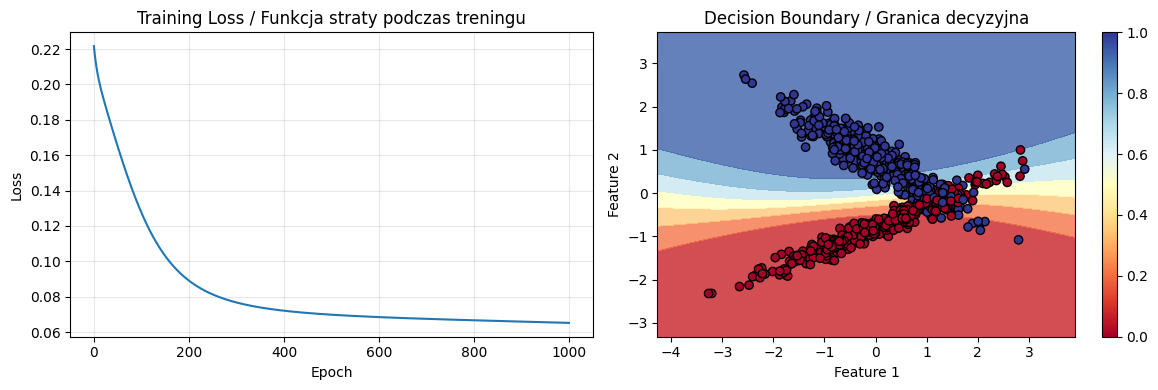

In [8]:
# Plot training loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(nn.loss_history)
plt.title('Training Loss / Funkcja straty podczas treningu')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True, alpha=0.3)

# Plot decision boundary
plt.subplot(1, 2, 2)
h = 0.02
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = nn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
scatter = plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train.ravel(), 
                     cmap=plt.cm.RdYlBu, edgecolors='black')
plt.colorbar(scatter)
plt.title('Decision Boundary / Granica decyzyjna')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


## **Key Takeaways / Kluczowe wnioski**

### **English**
1. **Neural networks** are powerful function approximators that can learn complex patterns
2. **Activation functions** introduce non-linearity, allowing networks to learn complex relationships
3. **Backpropagation** is the key algorithm for training neural networks
4. **Proper weight initialization** and **learning rate** are crucial for successful training
5. **Feature scaling** often improves training performance

### **Polish**
1. **Sieci neuronowe** to potężne aproksymatory funkcji, które mogą nauczyć się złożonych wzorców
2. **Funkcje aktywacji** wprowadzają nieliniowość, pozwalając sieciom na uczenie się złożonych relacji
3. **Propagacja wsteczna** to kluczowy algorytm do trenowania sieci neuronowych
4. **Właściwa inicjalizacja wag** i **współczynnik uczenia** są kluczowe dla udanego treningu
5. **Skalowanie cech** często poprawia wydajność treningu
